<h1>Data Analytics for Internet Demographic</h1>

<h3>Data Analyst: Bernard Gabito - BSIT 3A</h3>

In [10]:
pip install numpy seaborn pandas matplotlib openpyxl


     -------------------------------------- 250.9/250.9 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
internet = pd.read_excel("C:\\Users\\User\\Desktop\\ITD3A\\dataset\\internet.xlsx")

In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [15]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [16]:
internet['Income Group'] = internet['Income Group'].astype('category')

In [17]:
internet.dtypes

Country Name        object
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [19]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

<h1>INSIGHT 1</h1>

<h2>Top 5 countries with the highest percentage of internet users</h2>

In [79]:
top_internet = internet.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
print(top_internet)

    Country Name  Internet users
84       Iceland         96.5468
22       Bermuda         95.3000
131       Norway         95.0534
163       Sweden         94.7836
47       Denmark         94.6297


<h3>The top 5 countries with the highest number of internet users are Iceland (96.5468), Bermuda (95.3), Norway (95.0534), Sweden (94.7836), and Denmark (94.6297). All these countries belong to the high-income group, suggesting a strong correlation between economic development and widespread internet access. Lower birth rates in these nations may also reflect more developed infrastructure and higher investment in digital connectivity.</h3>

<h1>INSIGHT 2</h1>

<h2>Top 5 countries with the lowest percentage of internet users</h2>

In [82]:
bot_internet = internet.nsmallest(5, 'Internet users')[['Country Name', 'Internet users']]
print(bot_internet)

    Country Name  Internet users
52       Eritrea             0.9
172  Timor-Leste             1.1
11       Burundi             1.3
156      Somalia             1.5
64        Guinea             1.6


<h3>The bottom 5 countries with the lowest number of internet users—Eritrea (0.9), Timor-Leste (1.1), Burundi (1.3), Somalia (1.5), and Guinea (1.6)—are all low-income or lower-middle-income nations with high birth rates. This highlights the significant digital divide, as limited economic resources and infrastructure likely restrict internet access in these regions, further emphasizing the link between income levels and connectivity.</h3>

<h1>INSIGHT 3</h1>

<h2>Average internet usage for each income group.</h2>

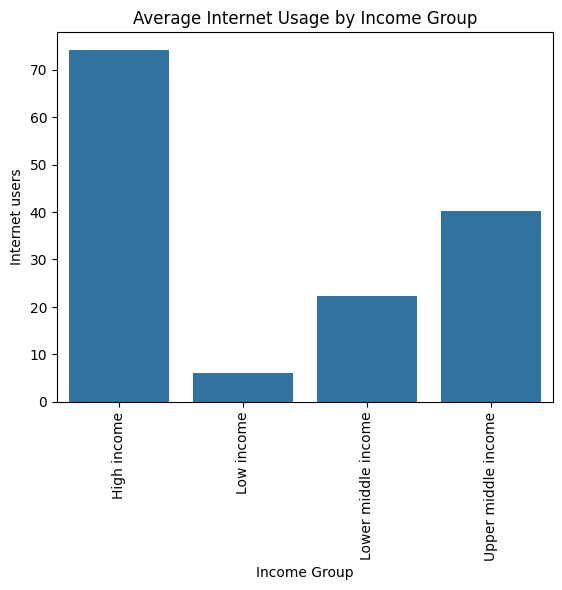

          Income Group  Internet users
0          High income       74.231684
1           Low income        5.988333
2  Lower middle income       22.366386
3  Upper middle income       40.279577


In [83]:
avg_internet_by_income = internet.groupby('Income Group')['Internet users'].mean().reset_index()
sns.barplot(x='Income Group', y='Internet users', data=avg_internet_by_income)
plt.title('Average Internet Usage by Income Group')
plt.xticks(rotation=90)
plt.show()

print(avg_internet_by_income)

<h1>INSIGHT 4</h1>

<h2>Proportion of countries in each income group.</h2>

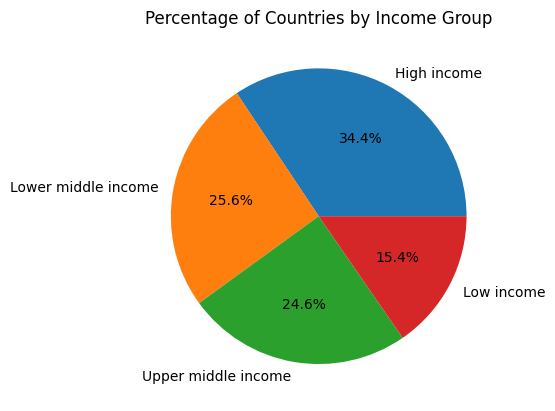

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64


In [84]:
income_group_counts = internet['Income Group'].value_counts()
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Countries by Income Group')
plt.show()

print(income_group_counts)

<h3>The distribution of countries across income groups shows that high-income countries make up the largest proportion (67 countries), followed by lower-middle-income (50 countries) and upper-middle-income (48 countries). Low-income countries are the least represented, with only 30 countries. This highlights the global economic divide, as high-income countries dominate the list, while low-income nations are fewer but likely face significant challenges in development and resource allocation.</h3>

<h1>INSIGHT 5</h1>

<h2>Relationship between birth rate and internet usage.</h2>

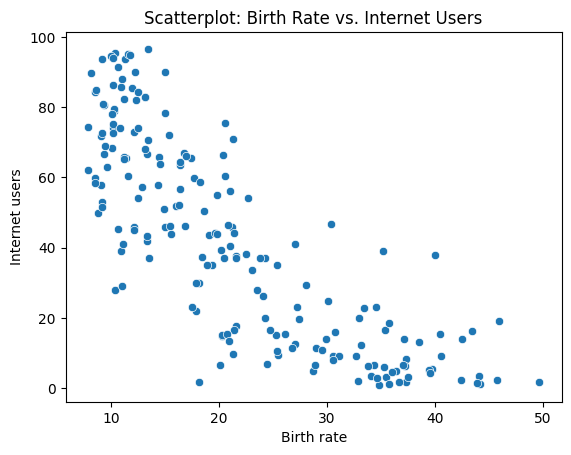

In [46]:
sns.scatterplot(x='Birth rate', y='Internet users', data=internet)
plt.title('Scatterplot: Birth Rate vs. Internet Users')
plt.show()

<h3>The scatterplot shows a negative correlation between birth rate and internet usage. As the birth rate increases, the percentage of internet users tends to decrease. This suggests that countries with higher birth rates (often low-income or developing nations) tend to have lower internet penetration, while countries with lower birth rates (often high-income or developed nations) have higher internet usage. This relationship could be influenced by factors such as economic development, infrastructure, and access to technology.</h3>

<h1>INSIGHT 6</h1>

<h2>Correlation between birth rate and internet users.</h2>

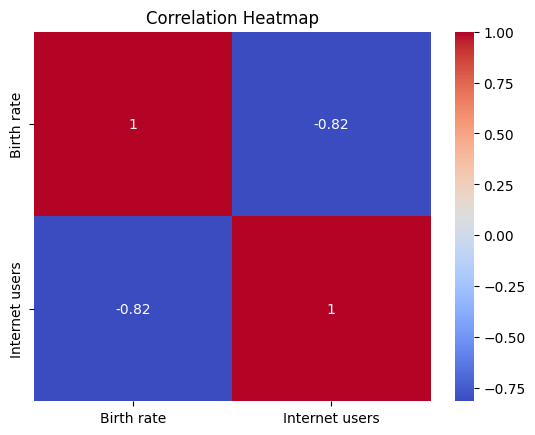

In [47]:
corr_matrix = internet[['Birth rate', 'Internet users']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h3>The correlation heatmap confirms a strong negative correlation between birth rate and internet usage, with a correlation coefficient of -0.82. This indicates that as the birth rate increases, the percentage of internet users tends to decrease significantly. The strong negative relationship suggests that countries with higher birth rates are likely to have lower levels of internet penetration, possibly due to economic constraints, limited infrastructure, or other socio-economic factors.</h3>

<h1>INSIGHT 7</h1>

<h2>Birth rate distributions across income groups.</h2>

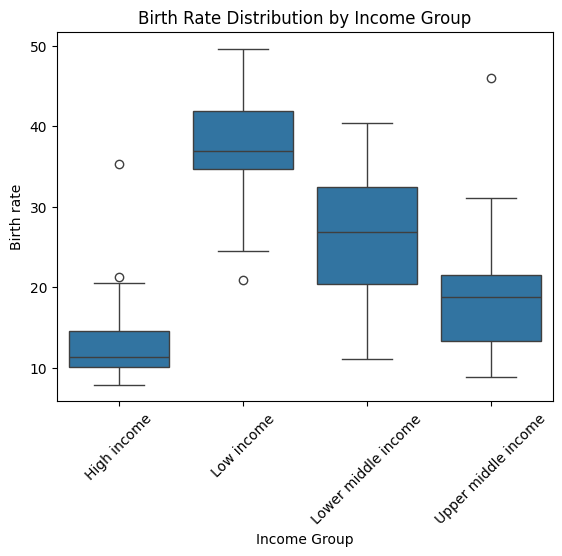

In [48]:
sns.boxplot(x='Income Group', y='Birth rate', data=internet)
plt.title('Birth Rate Distribution by Income Group')
plt.xticks(rotation=45)
plt.show()

<h3>The boxplot shows that low-income countries have the highest birth rates, while high-income countries have the lowest. Birth rates decrease as income levels increase, reflecting the impact of economic development, healthcare, and education on family size.</h3>

<h1>INSIGHT 8</h1>

<h2>Relationship between birth rate and internet users, colored by income group.</h2>

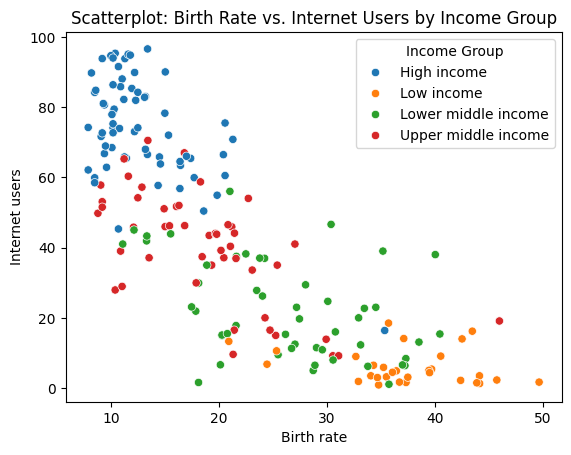

In [52]:
sns.scatterplot(x='Birth rate', y='Internet users', hue='Income Group', data=internet)
plt.title('Scatterplot: Birth Rate vs. Internet Users by Income Group')
plt.show()

<h3>The scatterplot shows a clear trend where high-income countries (blue) have both lower birth rates and higher internet usage, while low-income countries (orange) have higher birth rates and much lower internet usage. Lower-middle-income (green) and upper-middle-income (red) countries fall in between, with intermediate values for both birth rates and internet usage.</h3>

<h1>INSIGHT 9</h1>

<h2>Total internet users belong to each income group.</h2>

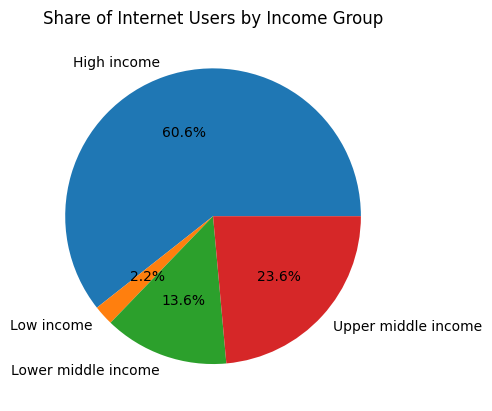

          Income Group  Internet users
0          High income     4973.522840
1           Low income      179.650000
2  Lower middle income     1118.319300
3  Upper middle income     1933.419684


In [77]:
internet_by_income = internet.groupby('Income Group')['Internet users'].sum().reset_index()
plt.pie(internet_by_income['Internet users'], labels=internet_by_income['Income Group'], autopct='%1.1f%%')
plt.title('Share of Internet Users by Income Group')
plt.show()

print(internet_by_income)

<h3>The pie chart shows that high-income countries hold the largest share of internet users, accounting for 60.6% of the total. This is significantly higher than other income groups, with upper-middle-income countries following at 23.6% , lower-middle-income countries at 13.6% , and low-income countries having the smallest share at 2.2% .</h3>

<h1>INSIGHT 10</h1>

<h2>Top 5 countries with the highest birth rates.</h2>

In [76]:
top_birth_rate = internet.nlargest(5, 'Birth rate')[['Country Name', 'Birth rate']]
print(top_birth_rate)

    Country Name  Birth rate
127        Niger      49.661
2         Angola      45.985
167         Chad      45.745
11       Burundi      44.151
115         Mali      44.138


<h3>The countries with the highest birth rates are Niger (49.661) , Angola (45.985) , Chad (45.745) , Burundi (44.151) , and Mali (44.138) . These nations, primarily in Africa, face challenges such as limited access to healthcare, education, and family planning resources, which contribute to high population growth rates.</h3>

<h1>INSIGHT 11</h1>

<h2>Top 5 countries with the lowest birth rates.</h2>

In [87]:
bot_birth_rate = internet.nsmallest(5, 'Birth rate')[['Country Name', 'Birth rate']]
print(bot_birth_rate)

             Country Name  Birth rate
74   Hong Kong SAR, China         7.9
142              Portugal         7.9
89                  Japan         8.2
45                Germany         8.5
68                 Greece         8.5


<h3>The countries with the lowest birth rates are Hong Kong SAR, China (7.9) , Portugal (7.9) , Japan (8.2) , Germany (8.5) , and Greece (8.5) . These nations, mostly developed economies, face challenges such as aging populations and low population growth, often linked to factors like urbanization, access to education, and high living costs.</h3>

<h1>INSIGHT 12</h1>

<h2>Distribution of internet users within each income group.</h2>

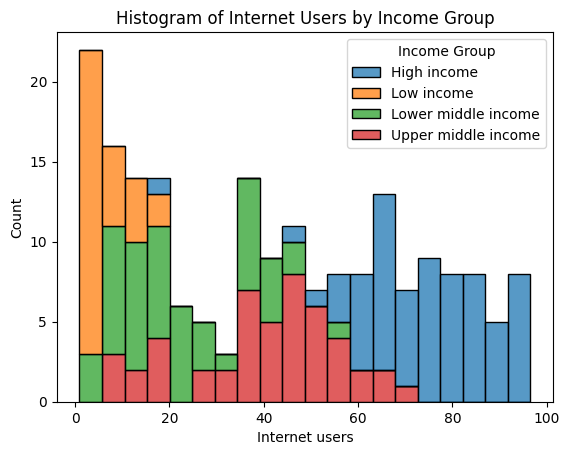

In [89]:
sns.histplot(data=internet, x='Internet users', hue='Income Group', multiple='stack', bins=20)
plt.title('Histogram of Internet Users by Income Group')
plt.show()

<h3>The histogram shows that high-income countries dominate the distribution of internet users, with a significant portion of users falling in the higher ranges (e.g., above 60%). In contrast, low-income , lower-middle-income , and upper-middle-income countries have much smaller proportions of internet users, particularly in the higher usage categories.</h3>

<h1>INSIGHT 13</h1>

<h2>Distribution of birth rates within each income group.</h2>

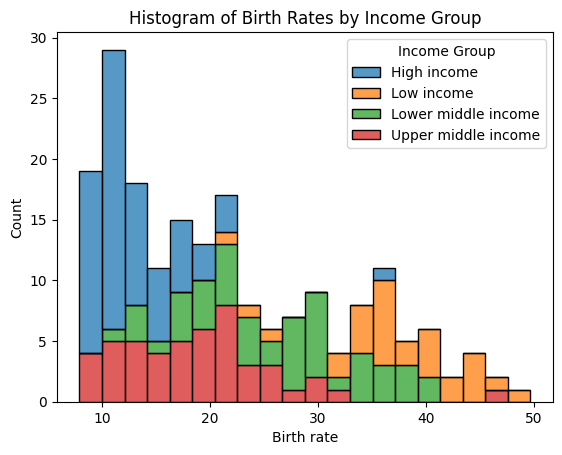

In [105]:
sns.histplot(data=internet, x='Birth rate', hue='Income Group', multiple='stack', bins=20)
plt.title('Histogram of Birth Rates by Income Group')
plt.show()

<h1>INSIGHT 14</h1>

<h2>Distribution of birth rates across income groups.</h2>

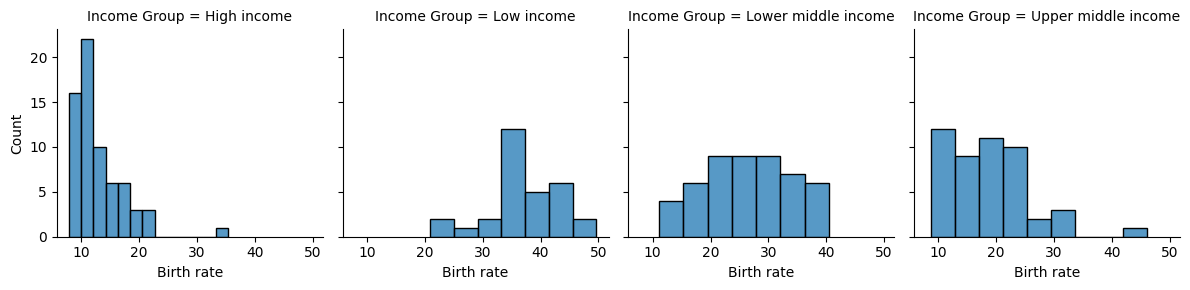

In [100]:
g = sns.FacetGrid(internet, col='Income Group')
g.map(sns.histplot, 'Birth rate')
plt.show()

<h3>The facet grid illustrates that birth rates vary significantly across income groups. High-income countries have the lowest birth rates, typically below 20, while low-income countries show the highest rates, often exceeding 30. Lower-middle-income and upper-middle-income countries fall in between, with birth rates ranging from 10 to 40.</h3>

<h1>INSIGHT 15</h1>

<h2>Relationships between Birth rate and Internet users</h2>

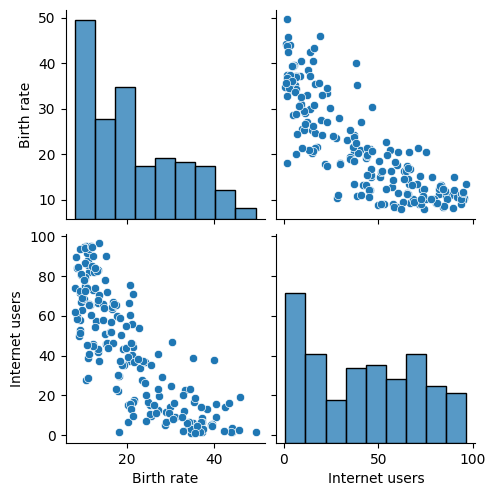

In [102]:
sns.pairplot(internet[['Birth rate', 'Internet users']])
plt.show()

<h3>The pairplot shows a strong negative correlation between birth rate and internet usage. As the birth rate increases, the percentage of internet users tends to decrease. The scatter plot confirms this trend, with data points forming a downward-sloping pattern. Additionally, the histograms on the diagonal show that birth rates are concentrated below 20 for high-income countries (with higher internet usage), while lower birth rates correspond to higher internet penetration. </h3>

<h1>INSIGHT 16</h1>

<h2>Contributions of each inncome group to total birth rate.</h2>

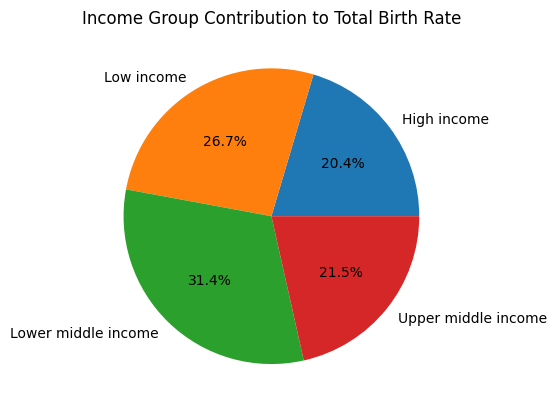

          Income Group  Birth rate
0          High income     854.480
1           Low income    1117.148
2  Lower middle income    1315.457
3  Upper middle income     899.551


In [104]:
birth_rate_by_income = internet.groupby('Income Group')['Birth rate'].sum().reset_index()
plt.pie(birth_rate_by_income['Birth rate'], labels=birth_rate_by_income['Income Group'], autopct='%1.1f%%')
plt.title('Income Group Contribution to Total Birth Rate')
plt.show()

print(birth_rate_by_income)

<h3>The contributions to the total birth rate are highest among lower-middle-income countries (1,315.46) and low-income countries (1,117.15) , reflecting their larger populations and higher birth rates. In contrast, high-income countries (854.48) and upper-middle-income countries (899.55) contribute less to the total birth rate due to lower birth rates and smaller population sizes in high-income nations.</h3>